In [50]:
import numpy as np
from astropy.nddata import Cutout2D
from matplotlib import pyplot as plt
%matplotlib inline
from astropy import units as u
from astropy.io import fits
import os
from astropy.table import Table
from astropy.wcs import WCS

In [51]:
#displaying VFID0011 (Dustin's cutout)

homedir = os.getenv("HOME")
filepath = homedir+'/github/VFID0011/unwise-VFID0011-w3-img-m.fits'
#fits.getdata yields a 2D numpy array of pixel values
hdu = fits.open(filepath)[0]
#to display, can use plt.imshow(data)

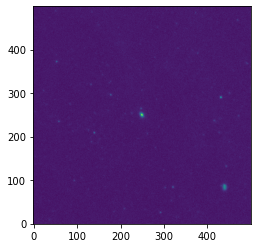

In [52]:
plt.imshow(hdu.data,origin='lower')

In [53]:
#Evidently, the above cutout is such that the central galaxy is a 
#wee bugger (which will be especially problematic when running GALFIT,
#since this program calculates the chi-squared of all pixels --> even
#more tricky with the implementation of psf).
#The cutouts are ALL 500x500 pixels, and due to the galaxy diversity 
#of the sample, trimming all cutouts with uniform boundaries would 
#not be appropriate. Let's try tailoring the code such that each 
#galaxy's "unique" features are accounted for...
#beginning with this test sample.
#NOTE: all .fits must be cut in this manner, including the 
#n-m mask, etc. 

In [54]:
wcs = WCS(hdu.header)

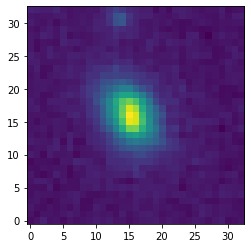

In [55]:
#firstly, grab the galaxy's catalog row...needed for radius
vf = Table.read(homedir+'/Desktop/v1-20210308/vf_north_v1_main.fits')
vf = vf[11]
size = vf['radius'] #arcsec

center = (250,250)
size = u.Quantity((size*2.5,size*2.5),u.arcsec)
cutout = Cutout2D(hdu.data, center, size,wcs=wcs)
plt.imshow(cutout.data, origin = 'lower')

In [ ]:
#much nicer.

In [44]:
#now to update header information and save the result

#put cutout image into .fits data
hdu.data = cutout.data
#update FITS header with the cutout WCS
hdu.header.update(cutout.wcs.to_header())
#write thecutout to a new FITS file
cutout_filename = 'unwise-VFID0011-img-m-trim.fits'
hdu.writeto(homedir+'/github/VFID0011/'+cutout_filename)

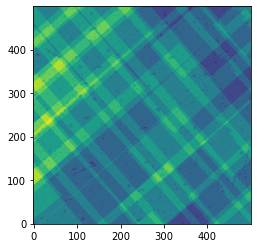

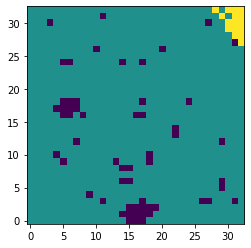

In [48]:
#lastly, apply this routine to *n-m.fits

filepath2 = homedir+'/github/VFID0011/unwise-VFID0011-w3-n-m.fits'
hdu2 = fits.open(filepath2)[0]
plt.imshow(hdu2.data,origin='lower')

wcs = WCS(hdu2.header)

cutout = Cutout2D(hdu2.data, center, size, wcs=wcs)
plt.figure()
plt.imshow(cutout.data, origin='lower')

-----

In [131]:
vf = Table.read(homedir+'/Desktop/v1-20210308/vf_north_v1_main.fits')
vf[1304]['prefix']

'VFID1304-NGC4088'

In [121]:
print(vf[1755]['RA'])
print(vf[1755]['DEC'])

140.76284399999997
44.5549042


In [132]:
vf[1308]

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,name
,,,,arcsec,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bytes36,bytes8
VFID1308,182.7680235,50.4849616,777.6,197.29735,True,NGC4157,627869,140872,0,NGC 4157,True,True,True,False,False,False,False,True,True,True,VFID1308-NGC4157,VFID1308
